In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras

from keras.datasets import cifar100
from keras.models import Sequential,Input,Model
from keras.models import load_model #save and load models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
import keras.backend as k

In [409]:
df = pd.read_csv("adult census/adult.data", names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
df1 = pd.read_csv(
    "adult census/adult.test",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
data = pd.concat([df, df1], ignore_index= True)
print(data.shape)
print(data.dtypes)

(48842, 15)
Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target            object
dtype: object


In [410]:
df1.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [411]:
names_cloud = data.columns.tolist()
print(names_cloud)
X = np.array(data[names_cloud])
print(X.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target']
(48842, 15)


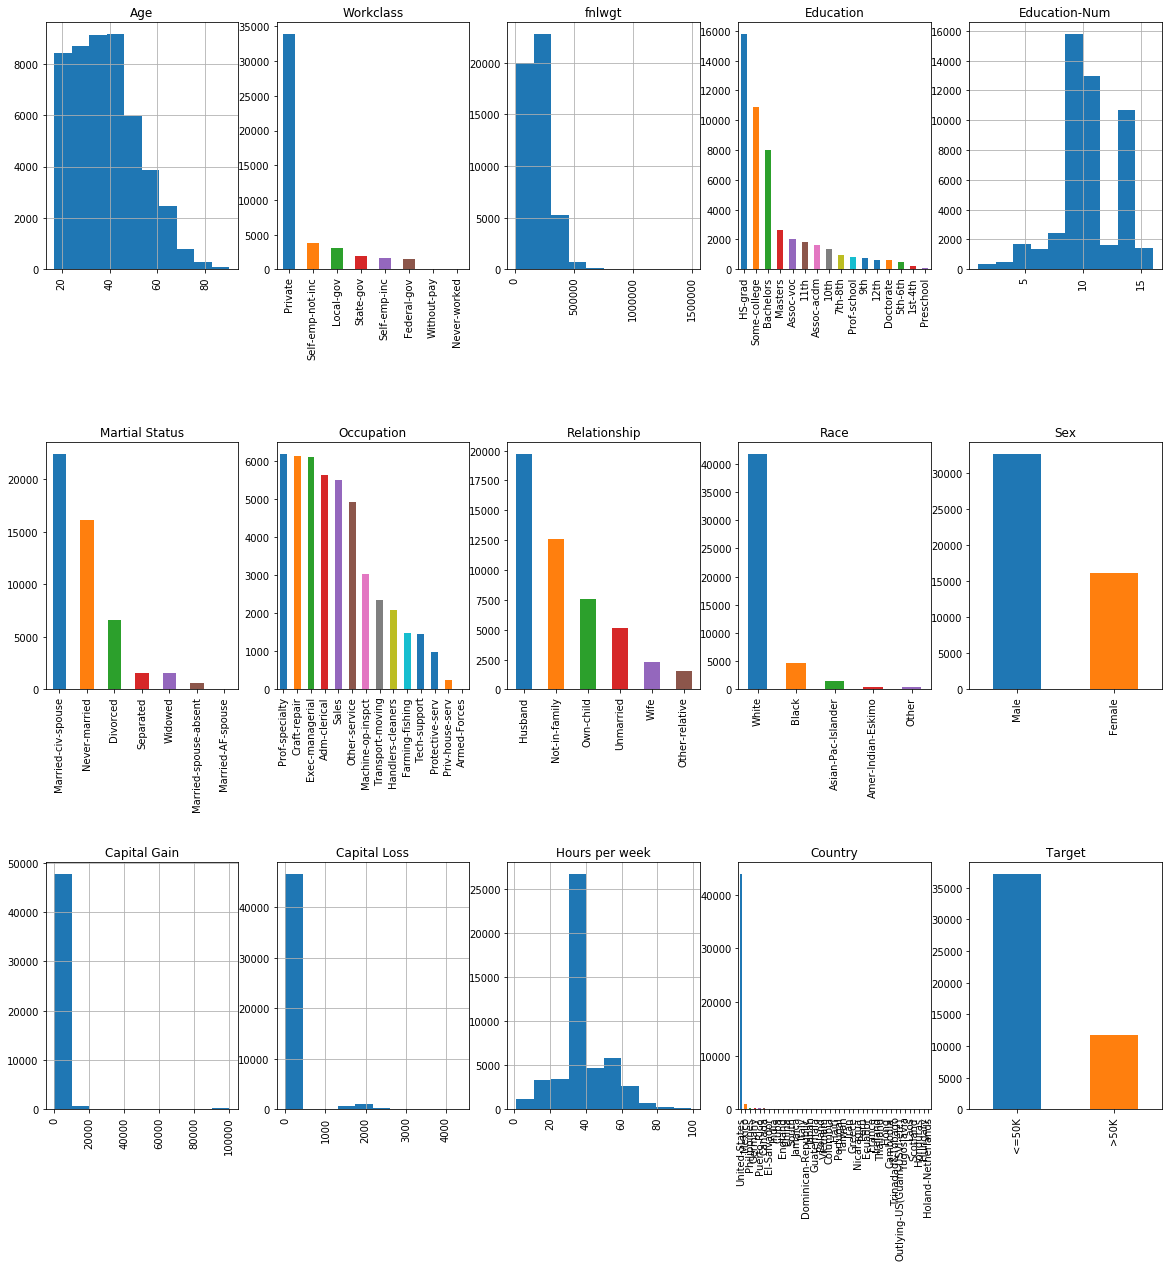

In [416]:
fig = plt.figure(figsize=(20,20))
cols = 5
rows = (float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    a = fig.add_subplot(rows, cols, i + 1)
    a.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=a)
    else:
        data[column].hist(axes=a)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [417]:
y = (data['Target'].map({"<=50K":0,">50K":1})).values
print(pd.value_counts(pd.Series(y)))
data.drop('Target',axis=1, inplace =True,)

0    37155
1    11687
dtype: int64


In [418]:
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)
ohc_category = ['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
df_ohc = pd.get_dummies(data, columns = ohc_category)
print(df_ohc.shape)
df_ohc.head()

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country'],
      dtype='object')
(48842, 105)


,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,...,Country_Portugal,Country_Puerto-Rico,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [419]:
names_x = df_ohc.columns.tolist()
print("Target Variable: Target")
print("Predictors: "+str(names_x))
x = np.array(df_ohc[names_x])
print("Number of data samples : {0:d}".format(x.shape[0]))
print("Number of Predictor Features : {0:d}".format(x.shape[1]))

Target Variable: Target
Predictors: ['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Never-worked', 'Workclass_Private', 'Workclass_Self-emp-inc', 'Workclass_Self-emp-not-inc', 'Workclass_State-gov', 'Workclass_Without-pay', 'Education_10th', 'Education_11th', 'Education_12th', 'Education_1st-4th', 'Education_5th-6th', 'Education_7th-8th', 'Education_9th', 'Education_Assoc-acdm', 'Education_Assoc-voc', 'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad', 'Education_Masters', 'Education_Preschool', 'Education_Prof-school', 'Education_Some-college', 'Martial Status_Divorced', 'Martial Status_Married-AF-spouse', 'Martial Status_Married-civ-spouse', 'Martial Status_Married-spouse-absent', 'Martial Status_Never-married', 'Martial Status_Separated', 'Martial Status_Widowed', 'Occupation_Adm-clerical', 'Occupation_Armed-Forces', 'Occupation_Craft-repair', 'Occupation_Exec-managerial', 

In [420]:
x = x.astype('float32')
x = x/255
batch_size = 32 #upto us
epochs = 100
lrate = 0.001
decay = 1e-7 
data_size = 10000
ns = 20 #number of shadow models for one data_size
nh = 5 #number of hidden layers
nout = 1
seed = 7
np.random.seed(seed)
sh = np.arange(x.shape[0])
np.random.shuffle(sh)
target_rep = np.zeros((1,x.shape[0]))
target_rep[0,:] = sh
print(sh)

[23509 38928 23796 ...   919 38467 10742]


In [433]:
k.clear_session()
xtr_target = x[sh[:data_size]]
ytr_target = y[sh[:data_size]]
xts_target = x[sh[data_size:data_size*2]]
yts_target = y[sh[data_size:2*data_size]]
shadow_rep = np.zeros((20,x.shape[0]-2*data_size))
sh1 = sh[2*data_size:]
xtr_att = np.zeros((2*data_size*ns,1))
ytr_att = np.zeros((2*data_size*ns,1))
xtr_att_truelabels = np.zeros((2*data_size*ns,))
model_target = Sequential()
model_target.add(Dense(nh, input_shape =(x.shape[1],), activation='sigmoid', name = 'hidden'))
model_target.add(Dense(1, activation='sigmoid', name = 'output'))
opt = keras.optimizers.adam(lr=lrate, decay=decay)
model_target.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
print(model_target.summary())
hist_target = model_target.fit(xtr_target, ytr_target,
                  batch_size = batch_size,
                  epochs = epochs,
                  validation_data=(xts_target, yts_target), shuffle=True, verbose=0)
print('\n\nFor target model with training datasize = %d'%data_size)
print('Training accuracy = %f'%hist_target.history['acc'][-1])
print('Validation accuracy = %f'%hist_target.history['val_acc'][-1])
model_target_name = 'UCI_Adult_target_'+str(data_size)+'.h5'
model_target.save(model_target_name)
ytemp_tr_target = model_target.predict(xtr_target)
ytemp_ts_target = model_target.predict(xts_target)
xts_att = np.vstack((ytemp_tr_target,ytemp_ts_target))
yts_att = np.zeros((2*data_size,1))
yts_att[data_size:2*data_size] = 1  
xts_att_truelabels = np.vstack((ytr_target,yts_target))
xts_att_dict = {'xts_att':xts_att,'yts_att':yts_att,'xts_att_truelabels':xts_att_truelabels}
fname = './att_test_data_'+str(data_size)
np.save(fname,xts_att_dict)
datafile = './data_adult_target_'+str(data_size)
np.save(datafile,target_rep)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 530       
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 536
Trainable params: 536
Non-trainable params: 0
_________________________________________________________________
None


For target model with training datasize = 10000
Training accuracy = 0.799100
Validation accuracy = 0.791500


In [ ]:
for i in np.arange(ns):
    np.random.shuffle(sh1)
    shadow_rep[i,:] = sh1
    xtr_shadow = x[sh1[:data_size]]
    ytr_shadow = y[sh1[:data_size]]
    xts_shadow = x[sh1[data_size:2*data_size]]
    yts_shadow = y[sh1[data_size:2*data_size]]
    model_shadow = Sequential()
    model_shadow.add(Dense(nh, input_shape =(x.shape[1],), activation='sigmoid', name = 'hidden'))
    model_shadow.add(Dense(1, activation='sigmoid', name = 'output'))
    opt = keras.optimizers.adam(lr=lrate, decay=decay)
    model_shadow.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    if i == 0:
        print("Shadow Model Summary")
        print(model_shadow.summary())
    hist_shadow = model_shadow.fit(xtr_shadow, ytr_shadow,
                  batch_size = batch_size,
                  epochs = epochs,
                  validation_data=(xts_shadow, yts_shadow), shuffle=True, verbose=0)
    print("Shadow model no: %d"%i)
    print('\n\nFor shadow model with training datasize = %d'%data_size)
    print('Training accuracy = %f'%hist_shadow.history['acc'][-1])
    print('Validation accuracy = %f'%hist_shadow.history['val_acc'][-1])
    ytemp11 = model_shadow.predict(xtr_shadow)
    ytemp22 = model_shadow.predict(xts_shadow)
    model_shadow_name = 'UCI_Adult_shadow_'+str(data_size)+'_'+str(i)+'.h5'
    print(model_shadow_name)
    model_shadow.save(model_shadow_name)    
    xtr_att[i*2*data_size:(i+1)*2*data_size] = np.vstack((ytemp11,ytemp22))
    ytr_att[((i*2)+1)*data_size:(i+1)*2*data_size] = 1
    xtr_att_truelabels[i*2*data_size:(i+1)*2*data_size] = np.hstack((ytr_shadow,yts_shadow))
datafile = './data_adult_shadow_'+str(data_size)
np.save(datafile,shadow_rep)
xtr_att_dict = {'xtr_att':xtr_att,'ytr_att':ytr_att,'xtr_att_truelabels':xtr_att_truelabels}
fname = './att_train_data_'+str(data_size)
np.save(fname,xtr_att_dict)

Shadow Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 530       
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 536
Trainable params: 536
Non-trainable params: 0
_________________________________________________________________
None
Shadow model no: 0


For shadow model with training datasize = 10000
Training accuracy = 0.811300
Validation accuracy = 0.813700
UCI_Adult_shadow_10000_0.h5
Shadow model no: 1


For shadow model with training datasize = 10000
Training accuracy = 0.811800
Validation accuracy = 0.815900
UCI_Adult_shadow_10000_1.h5
Shadow model no: 2


For shadow model with training datasize = 10000
Training accuracy = 0.809900
Validation accuracy = 0.818100
UCI_Adult_shadow_10000_2.h5
Shadow model no: 3


For shadow model with 

In [ ]:
model_attack = Sequential()
model_attack.add(Dense(nh, input_shape = (xtr_att.shape[1],), activation='sigmoid', name = 'hidden'))
model_attack.add(Dense(1, activation='sigmoid', name = 'output'))
opt = keras.optimizers.adam(lr = lrate, decay=decay)
model_attack.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
print("Attack Model Summary")
print(model_attack.summary())
hist_attack = model_attack.fit(xtr_att, ytr_att,
                  batch_size = batch_size,
                  epochs = epochs,
                  validation_data=(xts_att, yts_att), shuffle=True, verbose=0)
print('\n\nFor attack model with training datasize = %d'%xtr_att.shape[0])
print('Training accuracy = %f'%hist_attack.history['acc'][-1])
print('Validation accuracy = %f'%hist_attack.history['val_acc'][-1])
y_score = model_attack.predict(xts_att)
average_precision = average_precision_score(yts_att, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))